In [4]:
#library imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 5000)

In [5]:
#data inputs
brands = pd.read_json('/content/drive/MyDrive/Fetch Rewards Challenge/brands.json',lines=True)
receipts = pd.read_json('/content/drive/MyDrive/Fetch Rewards Challenge/receipts.json',lines=True)
users = pd.read_json('/content/drive/MyDrive/Fetch Rewards Challenge/users.json',lines=True)

## Analyzing the Brands Data for Data Quality

In [6]:
print("Duplicate Barcodes:")
for barcodes,count_ in dict(brands.barcode.value_counts()).items():
  if count_ > 1:
    print(barcodes)

duplicate_barcodes = brands[brands.barcode.isin(['511111204923','511111004790','511111305125','511111504788','511111504139','511111704140','511111605058'])]
duplicate_barcodes.sort_values('barcode')

Duplicate Barcodes:
511111204923
511111004790
511111305125
511111504788
511111504139
511111704140
511111605058


,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
467,{'$oid': '5c409ab4cd244a3539b84162'},511111004790,Baking,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '55b62995e4b0...",alexa,1.0,ALEXA
1071,{'$oid': '5cdacd63166eb33eb7ce0fa8'},511111004790,Condiments & Sauces,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '559c2234e4b0...",Bitten Dressing,NaN,BITTEN
152,{'$oid': '5c45f91b87ff3552f950f027'},511111204923,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5c45f8b087ff...",Brand1,1.0,0987654321
536,{'$oid': '5d6027f46d5f3b23d1bc7906'},511111204923,Snacks,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5fbe4b0...",CHESTER'S,NaN,CHESTERS
20,{'$oid': '5c4699f387ff3577e203ea29'},511111305125,Baby,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '55b62995e4b0...",Chris Image Test,NaN,CHRISIMAGE
651,{'$oid': '5d642d65a3a018514994f42d'},511111305125,Magazines,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5d5d4fd16d5f...",Rachael Ray Everyday,NaN,511111305125
129,{'$oid': '5a7e0604e4b0aedb3b84afd3'},511111504139,Beverages,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '55b62995e4b0...",Chris Brand XYZ,NaN,CHRISXYZ
299,{'$oid': '5a8c33f3e4b07f0a2dac8943'},511111504139,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5a734034e4b0...",Pace,0.0,PACE
9,{'$oid': '5c408e8bcd244a1fdb47aee7'},511111504788,Baking,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '59ba6f1ce4b0...",test,NaN,TEST
412,{'$oid': '5ccb2ece166eb31bbbadccbe'},511111504788,Condiments & Sauces,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '559c2234e4b0...",The Pioneer Woman,NaN,PIONEER WOMAN


- **Duplicate barcodes observed in the brands data.**
- **No two items can have same barcodes which can be observed above which will cause issue in mapping the items with rewards resulting in false rewards.**


### TopBrand Attribute

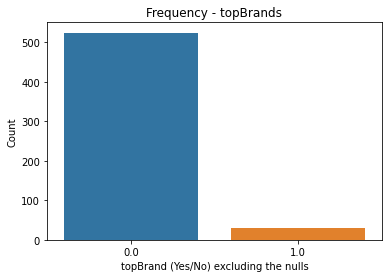

In [13]:
sns.barplot(y=list(brands.topBrand.value_counts()),x=list(brands.topBrand.value_counts().index))
plt.xlabel('topBrand (Yes/No) excluding the nulls')
plt.ylabel('Count')
plt.title('Frequency - topBrands')
plt.show()

- **Off the total 1167 brands(including the null values) only 2% of the brands are top brands.**

### Counting of Non-NA Records in each column

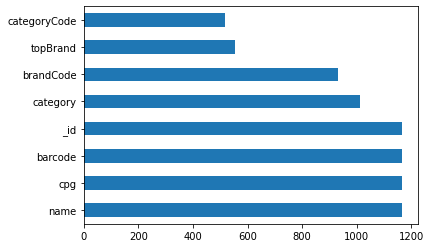

In [ ]:
ser = brands.count()
ser.sort_values(ascending=False,inplace=True)
ser.plot(kind='barh')

- **More the 50% of the values in the attributes categoryCode,topBrand have NA values.**
- **Missing values categoryCode wont allow us to drill down our at category level.**
- **Missing values or NaN in topBrand must be labeled with either 0 or 1 to maintain data consistency.**

## Analyzing the Receipts Data for Data Quality

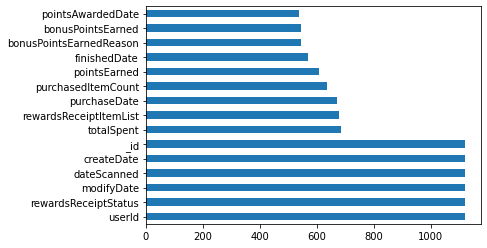

In [ ]:
val = receipts.count()
val.sort_values(ascending=False,inplace=True)
val.plot(kind='barh')

- **Missing / Null values are observed in majority of the columns.**
- **If no bonuspoints are earned bonus points should equal to 0 in order to maintain data integrity.**

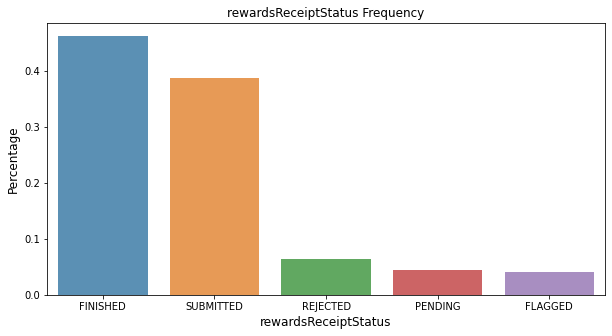

In [ ]:
import seaborn as sns
status_count  = receipts['rewardsReceiptStatus'].value_counts()
y = list(status_count.values)
sum_y = sum(status_count.values)
for i in range(0,len(y)):
  y[i] = y[i] / sum_y
plt.figure(figsize=(10,5))
sns.barplot(x = status_count.index, y = y, alpha=0.8)
plt.title('rewardsReceiptStatus Frequency')
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('rewardsReceiptStatus', fontsize=12)
plt.show()

- **~20% of the receipts are either rejected/pending/flagged.**

Minimum total Spent 0.0
Maximum total Spent 4721.95
Median total Spent 18.2
Mean total Spent 77.79685672514611
Mode total Spent 1.0


<Figure size 720x360 with 0 Axes>

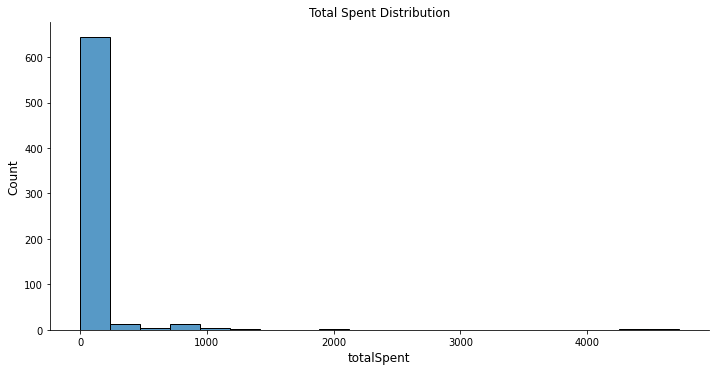

In [ ]:
print("Minimum total Spent",receipts.totalSpent.min())
print("Maximum total Spent",receipts.totalSpent.max())
print("Median total Spent",receipts.totalSpent.median())
print("Mean total Spent",receipts.totalSpent.mean())
print("Mode total Spent",receipts.totalSpent.mode()[0])
plt.figure(figsize=(10,5))
sns.displot(receipts.totalSpent,bins=20,aspect=2,kind='hist')
plt.title('Total Spent Distribution')
plt.ylabel('Count', fontsize=12)
plt.xlabel('totalSpent', fontsize=12)
plt.show()

- **Small fraction of records observe Extreme values of total spends where spend > 2000 which certainy needs to be validated.**
- **Surpising to see the reciepts having total spend == 0 (are these receipts with some promotions/giftcards while the purchase was made.)**

Minimum total pointsEarned 0.0
Maximum total pointsEarned 10199.8
Median total pointsEarned 150.0
Mean total pointsEarned 585.9628899835794
Mode total pointsEarned 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


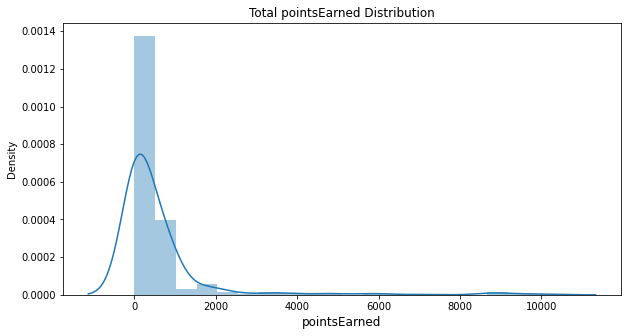

In [ ]:
print("Minimum total pointsEarned",receipts.pointsEarned.min())
print("Maximum total pointsEarned",receipts.pointsEarned.max())
print("Median total pointsEarned",receipts.pointsEarned.median())
print("Mean total pointsEarned",receipts.pointsEarned.mean())
print("Mode total pointsEarned",receipts.pointsEarned.mode()[0])
plt.figure(figsize=(10,5))
sns.distplot(receipts.pointsEarned,bins=20)
plt.title('Total pointsEarned Distribution')
plt.xlabel('pointsEarned', fontsize=12)
plt.show()

***Outlier Cases***
- **Small Percentage of the receipts have pointsEarned greater than > 4000.**
- **Maximum Points Earned - 10199.8 which certainly needs to be validated.**


## Analyzing the Users Data for Data Quality

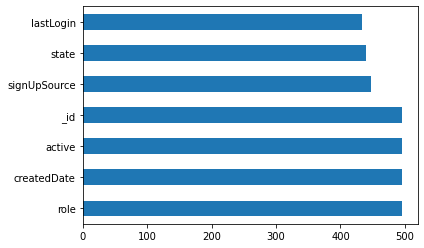

In [ ]:
val = users.count()
val.sort_values(ascending=False,inplace=True)
val.plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


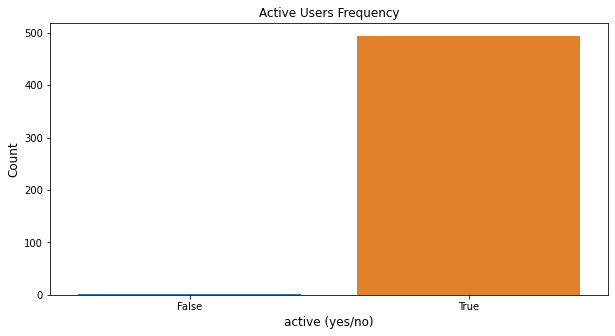

In [17]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(users['active'])
plt.title('Active Users Frequency')
plt.ylabel('Count', fontsize=12)
plt.xlabel('active (yes/no)', fontsize=12)
plt.show()

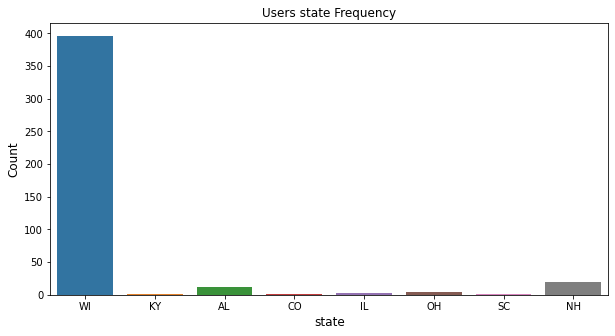

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x = users['state'])
plt.title('Users state Frequency')
plt.ylabel('Count', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.show()

- **Majority of the Users belong to the state of WI(Winscosin)**.
- **Users Data is biased towards specific states**

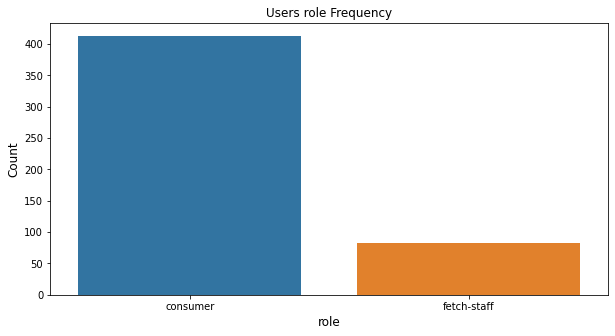

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x = users['role'])
plt.title('Users role Frequency')
plt.ylabel('Count', fontsize=12)
plt.xlabel('role', fontsize=12)
plt.show()

- **Data includes ~90 test accounts named with "fetch-staff".**

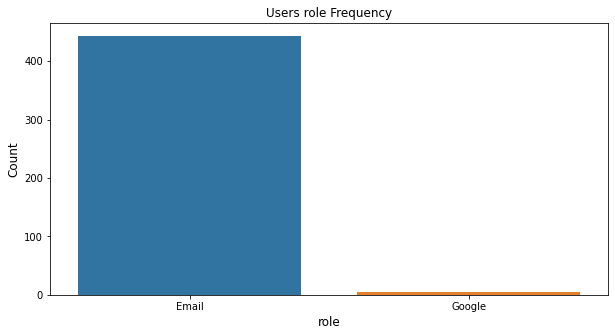

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x = users['signUpSource'])
plt.title('signUpSource Frequency')
plt.ylabel('Count', fontsize=12)
plt.xlabel('signUpSource', fontsize=12)
plt.show()

- **Surprising to see the Majority of the signupsources are coming from emails and not Google for the 500 users data provided.**